<a href="https://colab.research.google.com/github/isabellehaga/aq-data-scientist-test/blob/master/02_analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    Instruções:
        1- Responda as perguntas listadas no README.md;
        2- Faça as análises que julgar necessárias e deixe os resultados de suas análises plotadas no notebook.


In [1]:
#Importando bibliotecas

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point, Polygon

# Importando dados

Faça o upload dos arquivos gerados no notebook 01_etl.ipynb

In [3]:
arquivo1 = "/content/focos-desmatamento-mg.geojson"
gdf1 = gpd.read_file(arquivo1)

# Verificar os primeiros registros
gdf1.head(5)

,ogc_fid,id,Instância,Data Inicial,Data Final,Cena,Score,Data Processamento,Bioma,NuFis,Cia PM,geometry
0,1.0,6726,9696,26/07/2022,05/08/2022,22KFC,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((65610.256 7779397.013, 65659.326 777..."
1,2.0,6727,9700,21/07/2022,26/07/2022,22KFD,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((31696.271 7842130.438, 31989.678 784..."
2,3.0,6728,9701,21/07/2022,26/07/2022,22KFD,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((50597.259 7823297.562, 50665.831 782..."
3,4.0,6729,9702,21/07/2022,05/08/2022,22KFD,0.93,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((50538.446 7823306.388, 50636.036 782..."
4,5.0,6730,9703,21/07/2022,05/08/2022,22KFD,0.91,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((67719.523 7822648.62, 67877.128 7822..."


Descrição do Dataset:

*   ogc_fid:Identificador interno do arquivo geoespacial (geralmente gerado pelo software GIS).
*   id: Identificador único do registro do foco de desmatamento.
*   Instância: Desconhecido (precisa checar com a fonte)
*   Data Inicial: Data em que o desmatamento foi detectado e/ou começou a ser registrado.
*   Data Final: Data final que foi processado.
*   Cena: Desconhecido (precisa checar com a fonte)
*   Score: Valor de confiabilidade ou intensidade do desmatamento detectado
*   Data Processamento: Data em que os dados foram processados ou atualizados pelo sistema de monitoramento.
*   Bioma: Bioma onde o foco de desmatamento está localizado
*   NuFis: Macroregião
*   Cia PM: Desconhecido (precisa checar com a fonte)
*   geometry: Geometria do polígono que delimita a área do foco de desmatamento


In [4]:
#Verificando se os dados são somente de MG
gdf1['NuFis'].unique()

array(['Triângulo Mineiro', 'Sul', 'Alto Paranaíba', 'Noroeste',
       'Alto São Francisco', 'Norte', 'Central Metropolitana',
       'Zona da Mata', 'Jequitinhonha', 'Leste', 'Nordeste'], dtype=object)

In [5]:
# Verificando o CRS atual para confirmar que está em EPSG:31983
print(gdf1.crs)

EPSG:31983


##Qual a área total desmatada em hectares no estado de Minas Gerais em cada um dos meses de agosto e setembro de 2022?

In [6]:
# Calculando a área dos polígonos de desmatamento em duas unidades:
# 1. 'area_m2': área em metros quadrados (padrão do CRS EPSG:31983)
# 2. 'area_ha': área convertida para hectares (1 hectare = 10.000 m²)

gdf1['area_m2'] = gdf1.geometry.area
gdf1['area_ha'] = gdf1['area_m2'] / 10000

# Exibir as primeiras linhas para conferência
gdf1.head(5)


,ogc_fid,id,Instância,Data Inicial,Data Final,Cena,Score,Data Processamento,Bioma,NuFis,Cia PM,geometry,area_m2,area_ha
0,1.0,6726,9696,26/07/2022,05/08/2022,22KFC,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((65610.256 7779397.013, 65659.326 777...",152270.566768,15.227057
1,2.0,6727,9700,21/07/2022,26/07/2022,22KFD,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((31696.271 7842130.438, 31989.678 784...",742292.005763,74.229201
2,3.0,6728,9701,21/07/2022,26/07/2022,22KFD,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((50597.259 7823297.562, 50665.831 782...",25647.680020,2.564768
3,4.0,6729,9702,21/07/2022,05/08/2022,22KFD,0.93,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((50538.446 7823306.388, 50636.036 782...",33140.891916,3.314089
4,5.0,6730,9703,21/07/2022,05/08/2022,22KFD,0.91,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((67719.523 7822648.62, 67877.128 7822...",806717.990913,80.671799


In [9]:
# Somente para verificação constante de que a área total não se modificou ao londo no notebook.
gdf1['area_m2'].sum()

np.float64(411631430.84326255)

In [10]:
gdf1['area_ha'].sum()


np.float64(41163.143084326264)

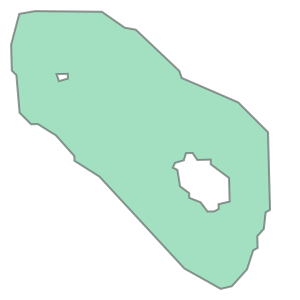

In [11]:
# Apenas para visuzalizar como o dado está configurado
gdf1['geometry'][1]

In [12]:
# Para calcular a área de desmatamento por mês, primeiro precisamos transformar a coluna 'Data Final' em datetime
# dayfirst=True garante que o formato dia/mês/ano seja corretamente interpretado

gdf1['Data Final'] = pd.to_datetime(gdf1['Data Final'], dayfirst=True)

# Criando uma nova coluna 'mes' que extrai apenas o mês da data final
gdf1['mes'] = gdf1['Data Final'].dt.month

# Agora podemos agrupar ou filtrar os dados por mês
gdf1.head(4)

,ogc_fid,id,Instância,Data Inicial,Data Final,Cena,Score,Data Processamento,Bioma,NuFis,Cia PM,geometry,area_m2,area_ha,mes
0,1.0,6726,9696,26/07/2022,2022-08-05,22KFC,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((65610.256 7779397.013, 65659.326 777...",152270.566768,15.227057,8
1,2.0,6727,9700,21/07/2022,2022-07-26,22KFD,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((31696.271 7842130.438, 31989.678 784...",742292.005763,74.229201,7
2,3.0,6728,9701,21/07/2022,2022-07-26,22KFD,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((50597.259 7823297.562, 50665.831 782...",25647.680020,2.564768,7
3,4.0,6729,9702,21/07/2022,2022-08-05,22KFD,0.93,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((50538.446 7823306.388, 50636.036 782...",33140.891916,3.314089,8


In [13]:
# Neste passo, estamos calculando a área total de desmatamento por mês

# 1. Agrupamos o GeoDataFrame pelo mês ('mes') usando groupby
# 2. Somamos as áreas em hectares ('area_ha') para cada mês
# 3. reset_index() transforma o resultado de volta em um DataFrame "normal"
# 4. Renomeamos a coluna resultante para 'area_total_ha' para ficar mais claro que se trata da soma total da área desmatada naquele mês

area_por_mes = gdf1.groupby('mes')['area_ha'].sum().reset_index()
area_por_mes.rename(columns={'area_ha': 'area_total_ha'}, inplace=True)

# O DataFrame 'area_por_mes' agora contém duas colunas:
# 'mes' -> número do mês (1 a 12)
# 'area_total_ha' -> área total desmatada em hectares naquele mês

In [14]:
area_por_mes.head(4)

,mes,area_total_ha
0,6,492.020742
1,7,4191.076846
2,8,7874.595999
3,9,28605.449498


In [15]:
#Somente para melhor visualização

area_agosto = area_por_mes.loc[area_por_mes['mes'] == 8, 'area_total_ha'].values[0]
area_setembro = area_por_mes.loc[area_por_mes['mes'] == 9, 'area_total_ha'].values[0]

# Imprimir de forma amigável
print(f"A área total desmatada em Minas Gerais no mês de agosto de 2022 foi {area_agosto:,.2f} hectares.")
print(f"A área total desmatada em Minas Gerais no mês de setembro de 2022 foi {area_setembro:,.2f} hectares.")


A área total desmatada em Minas Gerais no mês de agosto de 2022 foi 7,874.60 hectares.
A área total desmatada em Minas Gerais no mês de setembro de 2022 foi 28,605.45 hectares.


**Dataframes criados e sua descrição**

- gdf1 → Dados originais de desmatamento (polígonos, atributos da base IBAMA/PM, etc.), já convertidos para EPSG:31983 e agora com duas novas colunas:
  - area_m2 → área em metros quadrados (unidade padrão do CRS).
  - area_ha → área em hectares (1 ha = 10.000 m²).
  - mes → valos de mês retirado da coluna 'Data final'

- area_por_mes → DataFrame resumido, resultado de groupby('mes'), onde temos a área total desmatada em hectares por mês.
- area_agosto / area_setembro → valores extraídos do resumo para facilitar impressão em texto.

#Qual a área total desmatada em km² no estado de Minas Gerais em todo o período fornecido (ago/set de 2022) por bioma?

In [16]:
gdf1.head(2)

,ogc_fid,id,Instância,Data Inicial,Data Final,Cena,Score,Data Processamento,Bioma,NuFis,Cia PM,geometry,area_m2,area_ha,mes
0,1.0,6726,9696,26/07/2022,2022-08-05,22KFC,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((65610.256 7779397.013, 65659.326 777...",152270.566768,15.227057,8
1,2.0,6727,9700,21/07/2022,2022-07-26,22KFD,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((31696.271 7842130.438, 31989.678 784...",742292.005763,74.229201,7


In [17]:
# Criando coluna para cálculo de área em km²
gdf1['area_km2'] = gdf1['area_ha'] / 100  # 1 km² = 100 hectares

gdf1.head()

,ogc_fid,id,Instância,Data Inicial,Data Final,Cena,Score,Data Processamento,Bioma,NuFis,Cia PM,geometry,area_m2,area_ha,mes,area_km2
0,1.0,6726,9696,26/07/2022,2022-08-05,22KFC,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((65610.256 7779397.013, 65659.326 777...",152270.566768,15.227057,8,0.152271
1,2.0,6727,9700,21/07/2022,2022-07-26,22KFD,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((31696.271 7842130.438, 31989.678 784...",742292.005763,74.229201,7,0.742292
2,3.0,6728,9701,21/07/2022,2022-07-26,22KFD,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((50597.259 7823297.562, 50665.831 782...",25647.680020,2.564768,7,0.025648
3,4.0,6729,9702,21/07/2022,2022-08-05,22KFD,0.93,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((50538.446 7823306.388, 50636.036 782...",33140.891916,3.314089,8,0.033141
4,5.0,6730,9703,21/07/2022,2022-08-05,22KFD,0.91,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((67719.523 7822648.62, 67877.128 7822...",806717.990913,80.671799,8,0.806718


In [49]:
# Somente para verificação constante de que a área total não se modificou ao longo no notebook.
print(f"Número de linhas: {len(gdf1)} | Área total (km²): {gdf1['area_km2'].sum()}")


Número de linhas: 2039 | Área total (km²): 411.6314308432626


In [19]:
# Só para ficar mais organizado e 'mes' ficar por último
# Não é obrigatório fazer
# Guardar todas as colunas
cols = list(gdf1.columns)

# Remover 'mes' temporariamente da lista
cols.remove('mes')

# Colocar 'mes' no final
cols.append('mes')

# Reordenar o GeoDataFrame
gdf1 = gdf1[cols]

gdf1.head()


,ogc_fid,id,Instância,Data Inicial,Data Final,Cena,Score,Data Processamento,Bioma,NuFis,Cia PM,geometry,area_m2,area_ha,area_km2,mes
0,1.0,6726,9696,26/07/2022,2022-08-05,22KFC,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((65610.256 7779397.013, 65659.326 777...",152270.566768,15.227057,0.152271,8
1,2.0,6727,9700,21/07/2022,2022-07-26,22KFD,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((31696.271 7842130.438, 31989.678 784...",742292.005763,74.229201,0.742292,7
2,3.0,6728,9701,21/07/2022,2022-07-26,22KFD,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((50597.259 7823297.562, 50665.831 782...",25647.680020,2.564768,0.025648,7
3,4.0,6729,9702,21/07/2022,2022-08-05,22KFD,0.93,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((50538.446 7823306.388, 50636.036 782...",33140.891916,3.314089,0.033141,8
4,5.0,6730,9703,21/07/2022,2022-08-05,22KFD,0.91,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((67719.523 7822648.62, 67877.128 7822...",806717.990913,80.671799,0.806718,8


In [21]:
# Agrupando por bioma e somando os valores
area_por_bioma_antes_join = gdf1.groupby('Bioma')['area_km2'].sum().reset_index()
area_por_bioma_antes_join.rename(columns={'area_km2': 'area_total_km2'}, inplace=True)

area_por_bioma_antes_join


,Bioma,area_total_km2
0,Caatinga,58.671766
1,Cerrado,234.941821
2,Mata Atlântica,118.017844


In [23]:
# Somente para facilitar a visualização
for _, row in area_por_bioma_antes_join.iterrows():
    bioma = row['Bioma']
    area = row['area_total_km2']
    print(f"A área total desmatada no bioma {bioma} foi {area:,.2f} km².")


A área total desmatada no bioma Caatinga foi 58.67 km².
A área total desmatada no bioma Cerrado foi 234.94 km².
A área total desmatada no bioma Mata Atlântica foi 118.02 km².


#
DataFrames criados até aqui

- gdf1 → GeoDataFrame principal com colunas originais + cálculos adicionais
  - area_m2: área desmatada em metros quadrados
  - area_ha: área desmatada em hectares
  - area_km2: área desmatada em quilômetros quadrados
  - mes: mês extraído da coluna "Data Final"

- area_por_mes → DataFrame agrupando os registros por mês
  - mes: número do mês (1 = janeiro, 2 = fevereiro, etc.)
  - area_total_ha: soma da área desmatada (em hectares) por mês

-  area_por_bioma → DataFrame agrupando os registros por bioma
    - Bioma: nome do bioma (ex: Cerrado, Mata Atlântica...)
    - area_total_km2: soma da área desmatada (em km²) por bioma

# Qual é a área total desmatada em km² por município no estado de Minas Gerais em cada um dos meses de agosto e setembro de 2022?

In [24]:
gdf1.head(2)

,ogc_fid,id,Instância,Data Inicial,Data Final,Cena,Score,Data Processamento,Bioma,NuFis,Cia PM,geometry,area_m2,area_ha,area_km2,mes
0,1.0,6726,9696,26/07/2022,2022-08-05,22KFC,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((65610.256 7779397.013, 65659.326 777...",152270.566768,15.227057,0.152271,8
1,2.0,6727,9700,21/07/2022,2022-07-26,22KFD,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((31696.271 7842130.438, 31989.678 784...",742292.005763,74.229201,0.742292,7


Como o arquivo focos-desmatamento-mg não possui a coluna de municípios, é necessário relacioná-lo com o arquivo de municípios (municipios-mg.geojson).

In [27]:
# Importando o geoDataFrame dos municípios de MG
gdf_mun = gpd.read_file("/content/municipios-mg.geojson")



In [28]:
# Verificando o CRS atual para confirmar que está em EPSG:31983
print(gdf_mun.crs)

EPSG:31983


In [29]:
gdf_mun.head()

,id,name,description,area_km2,geometry
0,3100104,Abadia dos Dourados,Abadia dos Dourados,895.115178,"POLYGON ((241429.802 7990562.876, 242359.697 7..."
1,3100203,Abaeté,Abaeté,1814.504046,"POLYGON ((480831.209 7911603.048, 481764.623 7..."
2,3100302,Abre Campo,Abre Campo,472.049598,"POLYGON ((775002.321 7771717.815, 776244.59 77..."
3,3100401,Acaiaca,Acaiaca,100.723996,"POLYGON ((696872.185 7747792.052, 697305.64 77..."
4,3100500,Açucena,Açucena,812.875627,"POLYGON ((775332.208 7905556.756, 775804.655 7..."


In [30]:
# Só garantindo que o primeiro DF (gdf1) também está na mesma projeção
print(gdf1.crs)

EPSG:31983


In [32]:
# Transformamos 'gdf1' e 'gdf_mun' em GeoDataFrame e garantimos que ambos usem o mesmo CRS (sistema de referência).

# Desmatamento
gdf1 = gpd.GeoDataFrame(gdf1, geometry='geometry', crs=gdf_mun.crs)

# Municípios
gdf_mun = gpd.GeoDataFrame(gdf_mun, geometry='geometry', crs=gdf1.crs)


In [33]:
# A função 'assign_municipio_max_area(poly, gdf_mun)' calcula a interseção geométrica entre o polígono de desmatamento (poly)
# e cada polígono de município, mede a área de cada interseção e escolhe o município com a maior área de interseção.
# Ou seja, atribui o município que cobre a maior parte daquele polígono de desmatamento.

def assign_municipio_max_area(poly, gdf_mun):
    # Calcula área de interseção de um polígono com todos os municípios
    intersections = gdf_mun.geometry.intersection(poly)
    areas = intersections.area
    # Pega o índice do município com maior interseção
    idx = areas.idxmax()
    return gdf_mun.loc[idx, 'name']


In [34]:
# Cria uma nova coluna municipio_max em 'gdf1' aplicando essa função linha-a-linha sobre a geometria:

gdf1['municipio'] = gdf1.geometry.apply(lambda x: assign_municipio_max_area(x, gdf_mun))


In [35]:
# Isso evita o problema de duplicação que ocorreria se usássemos um join espacial normal (gpd.sjoin), já que um polígono
# que cruza a fronteira entre municípios apareceria duplicado — o que causaria um aumento artificial no número de registros
# ou na soma de áreas. Assim, cada polígono de desmatamento é associado a UM único município,de acordo com o critério
#da maior área de interseção.

gdf1.head()

,ogc_fid,id,Instância,Data Inicial,Data Final,Cena,Score,Data Processamento,Bioma,NuFis,Cia PM,geometry,area_m2,area_ha,area_km2,mes,municipio
0,1.0,6726,9696,26/07/2022,2022-08-05,22KFC,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((65610.256 7779397.013, 65659.326 777...",152270.566768,15.227057,0.152271,8,Frutal
1,2.0,6727,9700,21/07/2022,2022-07-26,22KFD,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((31696.271 7842130.438, 31989.678 784...",742292.005763,74.229201,0.742292,7,Campina Verde
2,3.0,6728,9701,21/07/2022,2022-07-26,22KFD,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((50597.259 7823297.562, 50665.831 782...",25647.680020,2.564768,0.025648,7,Comendador Gomes
3,4.0,6729,9702,21/07/2022,2022-08-05,22KFD,0.93,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((50538.446 7823306.388, 50636.036 782...",33140.891916,3.314089,0.033141,8,Comendador Gomes
4,5.0,6730,9703,21/07/2022,2022-08-05,22KFD,0.91,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((67719.523 7822648.62, 67877.128 7822...",806717.990913,80.671799,0.806718,8,Comendador Gomes


In [50]:
# Somente para checar se ainda condiz com o mesmo tamanho calculado anteriormente
print(
    "Linhas:", len(gdf1),
    "| Área total (km²):", gdf1['area_km2'].sum(),
    "| Área total (ha):", gdf1['area_ha'].sum()
)


Linhas: 2039 | Área total (km²): 411.6314308432626 | Área total (ha): 41163.143084326264


In [51]:
#Somente para checar se ainda codiz com o mesmo tamanho calculado anteriormente
area_por_bioma_depois_join = gdf1.groupby('Bioma')['area_km2'].sum().reset_index()
area_por_bioma_depois_join.rename(columns={'area_km2': 'area_total_km2'}, inplace=True)

area_por_bioma_depois_join

,Bioma,area_total_km2
0,Caatinga,58.671766
1,Cerrado,234.941821
2,Mata Atlântica,118.017844


In [40]:
gdf1.head(2)

,ogc_fid,id,Instância,Data Inicial,Data Final,Cena,Score,Data Processamento,Bioma,NuFis,Cia PM,geometry,area_m2,area_ha,area_km2,mes,municipio
0,1.0,6726,9696,26/07/2022,2022-08-05,22KFC,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((65610.256 7779397.013, 65659.326 777...",152270.566768,15.227057,0.152271,8,Frutal
1,2.0,6727,9700,21/07/2022,2022-07-26,22KFD,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((31696.271 7842130.438, 31989.678 784...",742292.005763,74.229201,0.742292,7,Campina Verde


In [52]:
# Agrupamos os dados por município e por mês, somando a área desmatada em km² para cada combinação.
area_por_municipio_mes = gdf1.groupby(['municipio', 'mes'])['area_km2'].sum().reset_index()

# Imprimimos o DataFrame resultante, que mostra a área total desmatada por município em cada mês.
print(area_por_municipio_mes)

               municipio  mes  area_km2
0    Abadia dos Dourados    8  0.444857
1    Abadia dos Dourados    9  0.136073
2                 Abaeté    8  0.210202
3                Aimorés    7  0.025325
4                Aimorés    9  1.200132
..                   ...  ...       ...
589        Água Comprida    7  0.496284
590        Água Comprida    8  1.135686
591       Águas Formosas    9  0.262786
592      Águas Vermelhas    6  0.370489
593      Águas Vermelhas    9  0.906330

[594 rows x 3 columns]


In [42]:
# Salvando o DataFrame para futuras análises estatísticas
gdf1.to_csv("desmatamento_mg_por_municipio.csv", index=False)
gdf1.to_file("desmatamento_mg_por_municipio.geojson", driver="GeoJSON")

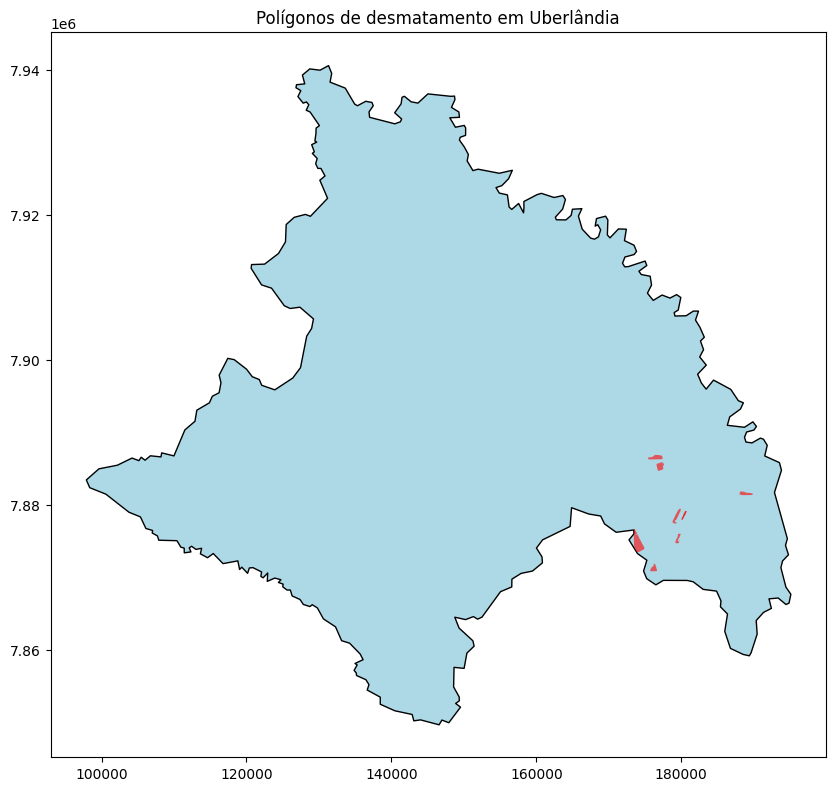

In [43]:
# Somente para facilitar o entendimento do DF. Não precisa rodar se não quiser
# Filtrar o município específico
mun = gdf_mun[gdf_mun['name'] == 'Uberlândia']

# Filtrar os polígonos de desmatamento que intersectam esse município
desmatamento_mun = gpd.overlay(gdf1, mun, how='intersection')

# Plotar
fig, ax = plt.subplots(figsize=(10,10))
mun.plot(ax=ax, color='lightblue', edgecolor='black')
desmatamento_mun.plot(ax=ax, color='red', alpha=0.6)
ax.set_title('Polígonos de desmatamento em Uberlândia')
plt.show()

# Análise de correlação entre as variáveis de população e PIB dos municípios de Minas Gerais e a área desmatada (ha)

Para fazer essa análise de correlação, preciso de um DF final que contenha os seguintes dados:

- população
- PIB dos municípios de Minas Gerais
- área desmatada (ha)

Nos meus DFs, só possuo a área desmatada (ha); vou importar os dados de PIB e população.



In [44]:
# carregar o CSV
df_pop_pib = pd.read_csv("/content/populacao-pib-municipios-mg.csv")

# dar uma olhada nas primeiras linhas
df_pop_pib.head(5)

,municipio,populacao,PIB
0,Abadia dos Dourados,6365.0,176773.658
1,Abaeté,23161.0,541239.206
2,Abre Campo,14312.0,262686.538
3,Acaiaca,3997.0,64907.018
4,Açucena,8995.0,165823.625


In [45]:
# Vou utilizar o arquivo criado anteriormente chamado desmatamento_mg_por_municipio.geojson que já possui
# dados dos muncipios e área desmatdas
# Caso você não se lembre, este DF contém os polígonos de desmatamento associados a cada município.

arquivo2 = "/content/desmatamento_mg_por_municipio.geojson"
gdf1_mun = gpd.read_file(arquivo2)

# Verificar os primeiros registros
gdf1_mun.head(5)


,ogc_fid,id,Instância,Data Inicial,Data Final,Cena,Score,Data Processamento,Bioma,NuFis,Cia PM,area_m2,area_ha,area_km2,mes,municipio,geometry
0,1.0,6726,9696,26/07/2022,2022-08-05,22KFC,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,152270.566768,15.227057,0.152271,8,Frutal,"POLYGON ((65610.256 7779397.013, 65659.326 777..."
1,2.0,6727,9700,21/07/2022,2022-07-26,22KFD,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,742292.005763,74.229201,0.742292,7,Campina Verde,"POLYGON ((31696.271 7842130.438, 31989.678 784..."
2,3.0,6728,9701,21/07/2022,2022-07-26,22KFD,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,25647.680020,2.564768,0.025648,7,Comendador Gomes,"POLYGON ((50597.259 7823297.562, 50665.831 782..."
3,4.0,6729,9702,21/07/2022,2022-08-05,22KFD,0.93,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,33140.891916,3.314089,0.033141,8,Comendador Gomes,"POLYGON ((50538.446 7823306.388, 50636.036 782..."
4,5.0,6730,9703,21/07/2022,2022-08-05,22KFD,0.91,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,806717.990913,80.671799,0.806718,8,Comendador Gomes,"POLYGON ((67719.523 7822648.62, 67877.128 7822..."


In [46]:
# É importante verificar se há duplicatas na coluna 'municipio'
gdf1_mun["municipio"].value_counts()

# Como existem duplicatas, significa que precisamos somar as áreas por município.


,count
municipio,
Paracatu,49
Jaíba,49
Janaúba,36
Uberaba,31
João Pinheiro,31
...,...
Monte Formoso,1
Rio do Prado,1
Almenara,1


In [47]:
#Somando area_ha por municipio por conta das duplicatas
area_por_municipio = gdf1_mun.groupby("municipio")["area_ha"].sum().reset_index()

area_por_municipio.head(5)

,municipio,area_ha
0,Abadia dos Dourados,58.093077
1,Abaeté,21.020224
2,Aimorés,122.545692
3,Alfenas,16.502817
4,Almenara,9.079250


In [53]:
area_por_municipio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   municipio  413 non-null    object 
 1   area_ha    413 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.6+ KB


In [54]:
# Unir os dados de população e PIB com a área desmatada por município
# Mantendo todos os municípios, mesmo os que não têm desmatamento
df_merged = pd.merge(df_pop_pib, area_por_municipio, on="municipio", how="left")

In [55]:
# Verificar se a junção dos dados de população, PIB e área desmatada funcionou corretamente
df_merged.head()

,municipio,populacao,PIB,area_ha
0,Abadia dos Dourados,6365.0,176773.658,58.093077
1,Abaeté,23161.0,541239.206,21.020224
2,Abre Campo,14312.0,262686.538,NaN
3,Acaiaca,3997.0,64907.018,NaN
4,Açucena,8995.0,165823.625,NaN


In [56]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   municipio  853 non-null    object 
 1   populacao  853 non-null    float64
 2   PIB        853 non-null    float64
 3   area_ha    413 non-null    float64
dtypes: float64(3), object(1)
memory usage: 26.8+ KB


In [57]:
# Substituindo valores ausentes (NaN) por 0 na coluna de área desmatada
# Isso garante que municípios sem desmatamento sejam considerados na análise
df_merged['area_ha'] = df_merged['area_ha'].fillna(0)


In [58]:
# Salvar como CSV
df_merged.to_csv("df_merged_mg.csv", index=False)
# Salvar como Excel
df_merged.to_excel("df_merged_mg.xlsx", index=False)


Aplicando a correlação

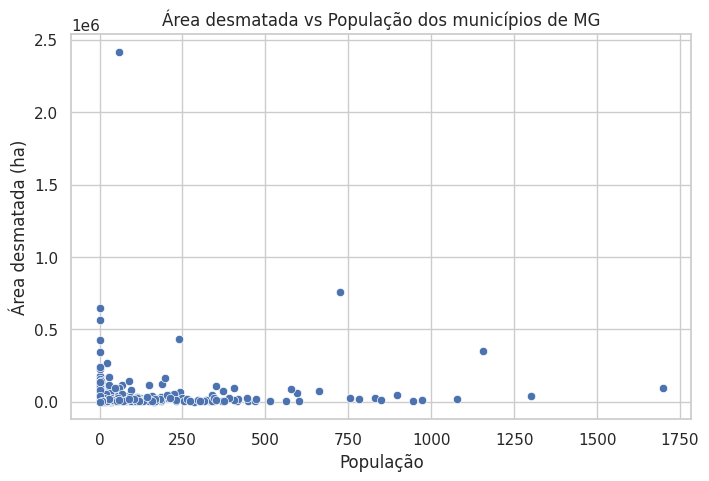

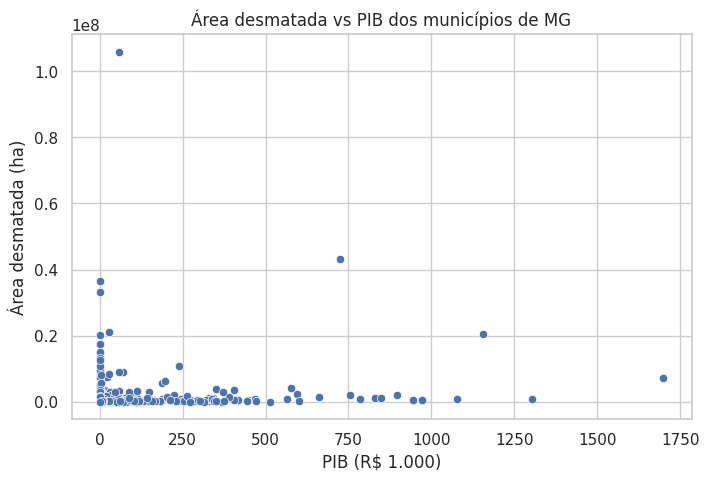

In [59]:
# Verificar se a correlação é positiva, negativa ou não há correlação
sns.set(style="whitegrid")

# Gráfico 1: Área desmatada vs População
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_merged, x="area_ha", y="populacao")
plt.title("Área desmatada vs População dos municípios de MG")
plt.xlabel("População")
plt.ylabel("Área desmatada (ha)")
plt.show()

# Gráfico 2: Área desmatada vs PIB
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_merged, x="area_ha", y="PIB")
plt.title("Área desmatada vs PIB dos municípios de MG")
plt.xlabel("PIB (R$ 1.000)")
plt.ylabel("Área desmatada (ha)")
plt.show()

# A correlação entre as variáveis não ficou evidente.
# Vamos aplicar novamente sem os outliers para ver se as relações ficam mais nítidas.

In [60]:
# Limites do percentil 95
area_lim = df_merged['area_ha'].quantile(0.95)
pop_lim = df_merged['populacao'].quantile(0.95)
pib_lim = df_merged['PIB'].quantile(0.95)

# Filtrar os dados
df_filtered = df_merged[(df_merged['area_ha'] <= area_lim) &
                        (df_merged['populacao'] <= pop_lim) &
                        (df_merged['PIB'] <= pib_lim)]


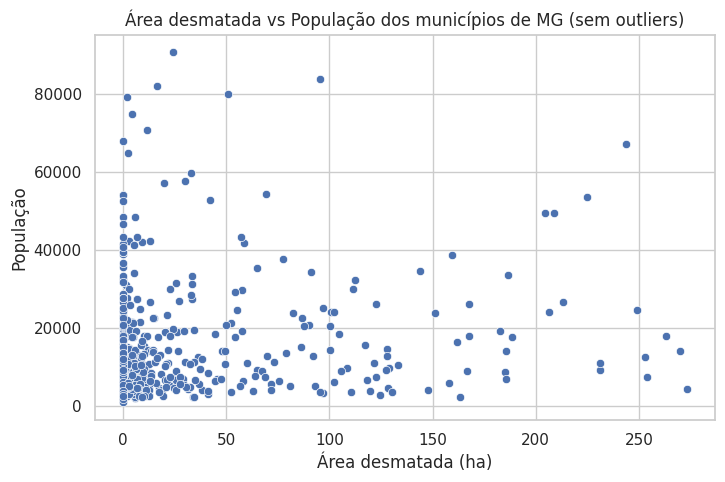

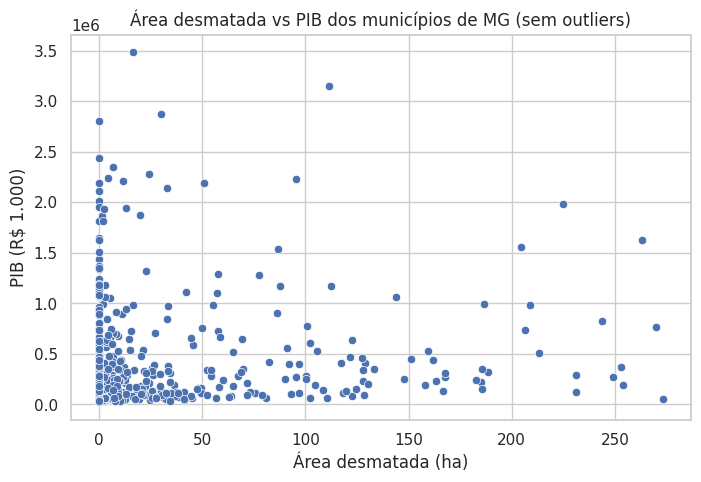

In [61]:
# Gráfico 1: Área desmatada vs População
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_filtered, x="area_ha", y="populacao")
plt.title("Área desmatada vs População dos municípios de MG (sem outliers)")
plt.xlabel("Área desmatada (ha)")
plt.ylabel("População")
plt.show()

# Gráfico 2: Área desmatada vs PIB
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_filtered, x="area_ha", y="PIB")
plt.title("Área desmatada vs PIB dos municípios de MG (sem outliers)")
plt.xlabel("Área desmatada (ha)")
plt.ylabel("PIB (R$ 1.000)")
plt.show()

# A correlação entre as variáveis ainda não está evidente.
# Vamos aplicar uma transformação logarítmica nos dados para ver se as relações ficam mais nítidas.


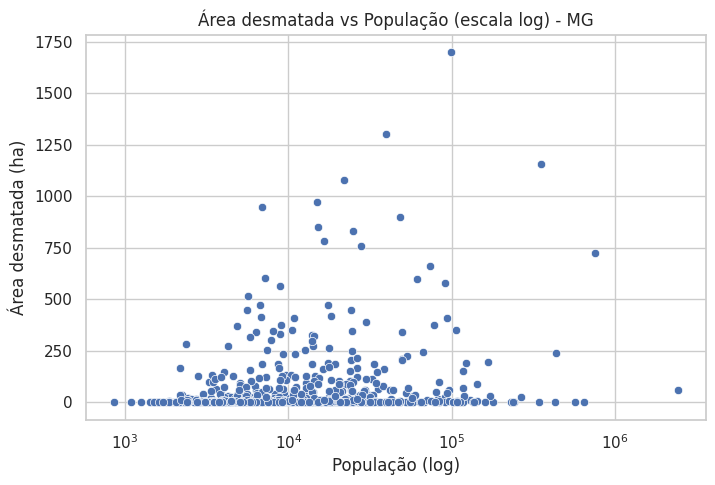

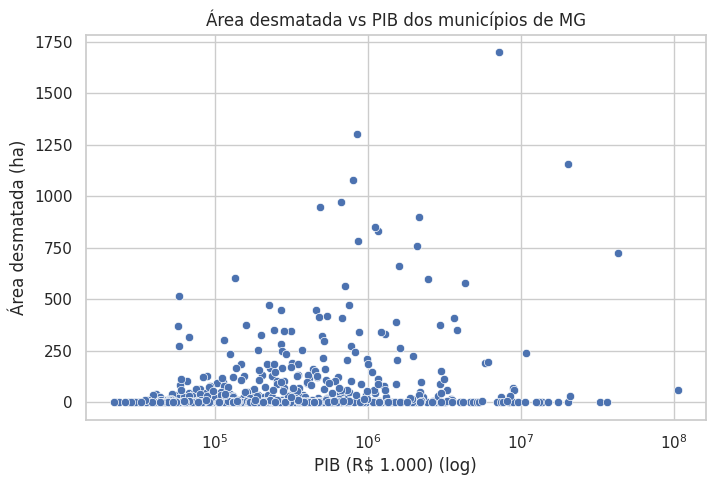

In [62]:
# Verificar se a correlação é positiva, negativa ou não há correlação
sns.set(style="whitegrid")

# Gráfico 1: Área desmatada vs População
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_merged, x="populacao", y="area_ha")
plt.xscale("log")  # escala logarítmica no eixo x
plt.title("Área desmatada vs População (escala log) - MG")
plt.xlabel("População (log)")
plt.ylabel("Área desmatada (ha)")
plt.show()

# Gráfico 2: Área desmatada vs PIB
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_merged, x="PIB", y="area_ha")
plt.xscale("log")  # escala logarítmica no eixo x
plt.title("Área desmatada vs PIB dos municípios de MG")
plt.xlabel("PIB (R$ 1.000) (log)")
plt.ylabel("Área desmatada (ha)")
plt.show()

# A correlação entre as variáveis novamente está fraca
# Vamos aplicar com uma linha de tendência e depois calcular os valores da correlação de Pearson

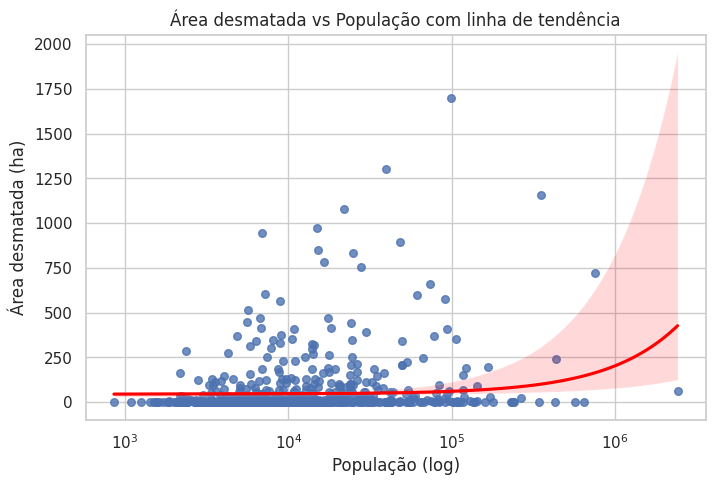

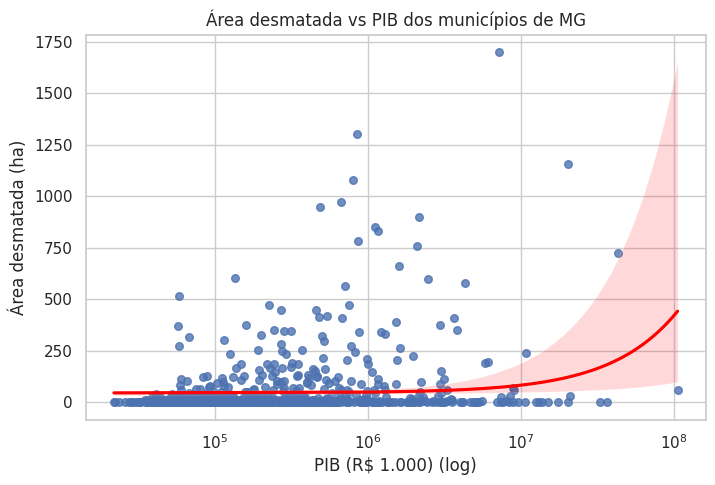

In [63]:
plt.figure(figsize=(8,5))
sns.regplot(data=df_merged, x="populacao", y="area_ha", scatter_kws={'s':30}, line_kws={'color':'red'})
plt.xscale("log")
plt.title("Área desmatada vs População com linha de tendência")
plt.xlabel("População (log)")
plt.ylabel("Área desmatada (ha)")
plt.show()

# Gráfico 2: Área desmatada vs PIB
plt.figure(figsize=(8,5))
sns.regplot(data=df_merged, x="PIB", y="area_ha", scatter_kws={'s':30}, line_kws={'color':'red'})
plt.xscale("log")  # escala logarítmica no eixo x
plt.title("Área desmatada vs PIB dos municípios de MG")
plt.xlabel("PIB (R$ 1.000) (log)")
plt.ylabel("Área desmatada (ha)")
plt.show()


##
Vamos calcular a correlação de Pearson



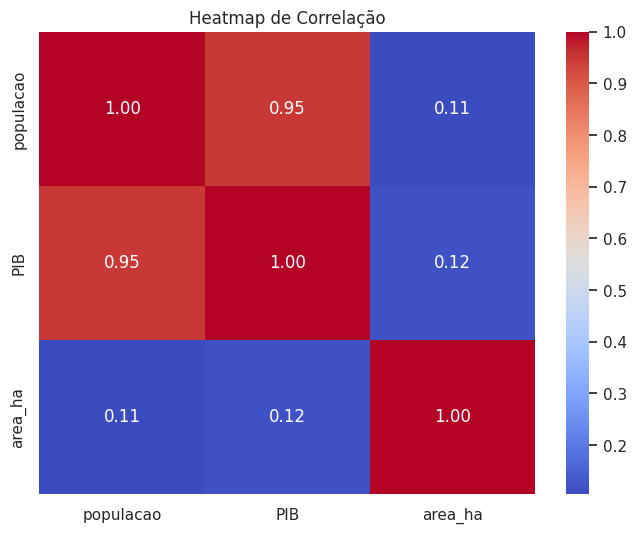

'Interpretação da força (regra geral):\n0 a 0,3 (ou 0 a -0,3): fraca\n0,3 a 0,6 (ou -0,3 a -0,6): moderada\n0,6 a 1 (ou -0,6 a -1): forte'

In [64]:
# Selecionando apenas as colunas numéricas
numericas = df_merged[['populacao', 'PIB', 'area_ha']]

# Calculando a correlação
corr = numericas.corr()

# Criando o heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap de Correlação")
plt.show()

# Assim como observado nos gráficos anteriores, a correlação entre PIB/População e desmatamento é fraca.
# Portanto, é necessário investigar outras variáveis que possam ter maior relação com a área desmatada,
# como o mês, o bioma, a mesorregião ou outras características geográficas e socioeconômicas.
"""Interpretação da força (regra geral):
0 a 0,3 (ou 0 a -0,3): fraca
0,3 a 0,6 (ou -0,3 a -0,6): moderada
0,6 a 1 (ou -0,6 a -1): forte"""
